# LGM DATA SCIENCE INTERNSHIP

# By Mounika Vardhini

# Beginner Level Task 2:

# Stock Market Prediction And Forecasting Using Stacked LSTM

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dataset="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"""
data=pd.read_csv(dataset)


In [21]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [22]:
data.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [23]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [24]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


# Data sorting

In [25]:
data['Date']=pd.to_datetime(data['Date'])

In [26]:
df = data.sort_values('Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [27]:
df_close=df['Close']
df_close

2034    121.55
2033    120.90
2032    120.65
2031    117.60
2030    118.65
         ...  
4       233.30
3       236.10
2       234.25
1       233.25
0       233.75
Name: Close, Length: 2035, dtype: float64

In [28]:
df.reset_index(inplace=True)

In [29]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Data Visualization

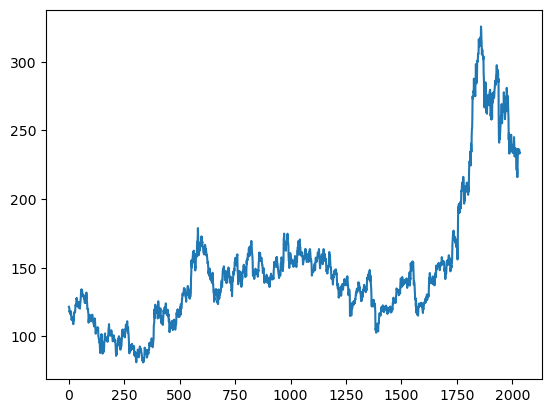

In [30]:
plt.plot(df['Close'])

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Train and Test split

In [32]:
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))
print(df_close)

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.62622549]
 [0.62214052]
 [0.62418301]]


In [33]:
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [34]:
df_close.shape

(2035, 1)

In [35]:
training_size=int(len(df_close)*0.60)
test_size=len(df_close)-training_size
train_data,test_data=df_close[0:training_size,:],df_close[training_size:len(df_close),:1]
training_size,test_size

(1221, 814)

In [36]:
test_data

array([[0.21098856],
       [0.21568627],
       [0.22079248],
       [0.21609477],
       [0.21343954],
       [0.22365196],
       [0.21609477],
       [0.19852941],
       [0.20935458],
       [0.22303922],
       [0.22937092],
       [0.22528595],
       [0.22079248],
       [0.23386438],
       [0.22038399],
       [0.21650327],
       [0.21895425],
       [0.22814542],
       [0.22916667],
       [0.23366013],
       [0.23304739],
       [0.23713235],
       [0.24836601],
       [0.2310049 ],
       [0.23917484],
       [0.24468954],
       [0.24448529],
       [0.23120915],
       [0.23080065],
       [0.23570261],
       [0.22957516],
       [0.24203431],
       [0.24468954],
       [0.25469771],
       [0.25      ],
       [0.25653595],
       [0.24918301],
       [0.2369281 ],
       [0.2318219 ],
       [0.2128268 ],
       [0.20036765],
       [0.20894608],
       [0.20445261],
       [0.21732026],
       [0.21589052],
       [0.21221405],
       [0.20200163],
       [0.138

In [37]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.19669118],
       [0.19505719],
       [0.20996732]])

In [38]:
def create_dataset(dataset, time_step=1):
    dataX,dataY = [],[]
    
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [39]:
time_step=100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [40]:
X_train.shape

(1120, 100)

In [41]:
y_train.shape

(1120,)

In [42]:
X_test.shape

(713, 100)

In [43]:
y_test.shape

(713,)

In [44]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

# LSTM Model

In [45]:
import tensorflow as tf

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [47]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X_train,y_train,validation_split=0.2,epochs=70,batch_size=64,verbose=1)

Epoch 1/70
14/14 [==============================] - 18s 382ms/step - loss: 0.0121 - val_loss: 0.0090
Epoch 2/70
14/14 [==============================] - 3s 231ms/step - loss: 0.0031 - val_loss: 7.5148e-04
Epoch 3/70
14/14 [==============================] - 3s 231ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 4/70
14/14 [==============================] - 3s 221ms/step - loss: 0.0010 - val_loss: 5.9207e-04
Epoch 5/70
14/14 [==============================] - 3s 220ms/step - loss: 9.2851e-04 - val_loss: 5.5553e-04
Epoch 6/70
14/14 [==============================] - 3s 214ms/step - loss: 8.9214e-04 - val_loss: 5.3969e-04
Epoch 7/70
14/14 [==============================] - 3s 216ms/step - loss: 8.5120e-04 - val_loss: 6.7097e-04
Epoch 8/70
14/14 [==============================] - 3s 215ms/step - loss: 8.4003e-04 - val_loss: 7.5534e-04
Epoch 9/70
14/14 [==============================] - 3s 216ms/step - loss: 8.2664e-04 - val_loss: 5.4750e-04
Epoch 10/70
14/14 [==============================] 

In [50]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 [==============================] - 3s 47ms/step


In [51]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [52]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

135.47036013036285

In [53]:
math.sqrt(mean_squared_error(y_test,test_predict))

183.29968647365786

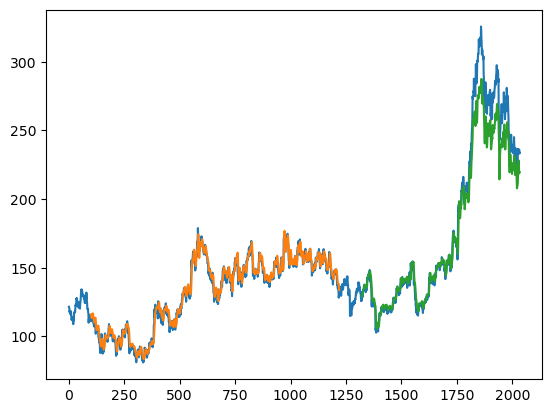

In [54]:
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=np.empty_like(df_close)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [55]:
x_input=test_data[714:].reshape(1,-1)
x_input.shape

(1, 100)

In [56]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [57]:
lst_output=[]
n_steps=100
i=0
nextDays=30

while(i<nextDays):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps, 1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
            x_input=x_input.reshape((1,n_steps,1))
            yhat=model.predict(x_input,verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    print(lst_output)
            

[0.57447165]
101
[[0.574471652507782]]
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392

# Thank You